In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ta_py #https://pypi.org/project/ta-py/

In [3]:
import ta_py as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read csv

In [27]:
# btc = pd.read_csv('/content/drive/MyDrive/Stock Market Group/DataSet/Crypto Dataset 2024/BTCUSDT_5mins_last_12000_rows.csv')
ltc = pd.read_csv('/content/drive/MyDrive/Stock Market Group/DataSet/Crypto Dataset 2024/LTCUSDT_5mins_last_12000_rows.csv')
eth = pd.read_csv('/content/drive/MyDrive/Stock Market Group/DataSet/Crypto Dataset 2024/ETHUSDT_5mins_last_12000_rows.csv')

In [24]:
# btc.head()
ltc.head()
# eth.head()

,ds (UTC),Open,High,Low,Close,Volume
0,2023-12-24 13:35:00 UTC,72.46,72.56,72.43,72.49,1404.668
1,2023-12-24 13:40:00 UTC,72.49,72.49,72.32,72.34,1069.747
2,2023-12-24 13:45:00 UTC,72.34,72.44,72.32,72.36,1095.191
3,2023-12-24 13:50:00 UTC,72.35,72.52,72.33,72.51,1505.822
4,2023-12-24 13:55:00 UTC,72.51,72.54,72.48,72.50,738.019


#Data Prepocess

- Replace Close price with Adj Close

In [ ]:
def process(dataset_ex_df):
  dataset_ex_df['pct_change'] = (dataset_ex_df['Close'] - dataset_ex_df['Close'].shift(1))/ dataset_ex_df['Close'].shift(1)
  dataset_ex_df['log_change'] = np.log(dataset_ex_df['Close']/ dataset_ex_df['Close'].shift(1))
  # print(dataset_ex_df.head())

  return dataset_ex_df

In [ ]:
# btc=process(btc)

#Technical Indicatros

## Description



Simpe Moving Average (SMA)
```
data = [1, 2, 3, 4, 5, 6, 10];
length = 6; # default = 14
ta.sma(data, length);
```


Weighted Moving Average (WMA)
```
data = [69, 68, 66, 70, 68];
length = 4; # default = 14
ta.wma(data, length);
```



Exponential Moving Average (EMA)
```
data = [1, 2, 3, 4, 5, 6, 10];
length = 6; # default = 12
ta.ema(data, length);
```

Least Squares Moving Average (LSMA)
```
data = [5, 6, 6, 3, 4, 6, 7];
length = 6; # default = 25
ta.lsma(data, length);
```

Volume Weighted Moving Average (VWMA)
```
data = [[1, 59], [1.1, 82], [1.21, 27], [1.42, 73], [1.32, 42]]; # [price, volume (quantity)]
length = 4; # default = 20
ta.vwma(data, length);
```

Parabolic Weighted Moving Average
```
 data = [17, 26, 23, 29, 20];
 length = 4; # default = 14
ta.pwma(data, length);
```

Hyperbolic Weighted Moving Average
```
data = [54, 51, 86, 42, 47];
length = 4; # default = 14
ta.hwma(data, length);
```
Moving Average Convergence / Divergence (MACD)
```
data = [1, 2, 3, 4, 5, 6, 14];
length1 = 3; # default = 12
length2 = 6; # default = 26
ta.macd(data, length1, length2);
```

Relative Strength Index (RSI)
```
data = [1, 2, 3, 4, 5, 6, 7, 5];
length = 6; # default = 14
ta.rsi(data, length);
```

Wilder's Relative Strength Index
```
data = [1, 2, 3, 4, 5, 6, 7, 5, 6];
length = 6; # default = 14
print(ta.wrsi(data, length));
```

True Strength Index (TSI)
```
data = [1.32, 1.27, 1.42, 1.47, 1.42, 1.45, 1.59];
longlength = 3; # default = 25
shortlength = 2; # default = 13
signallength = 2; # default = 13
ta.tsi(data, longlength, shortlength, signallength);
```

Force Index
```
data = [[1.4, 200], [1.5, 240], [1.1, 300], [1.2, 240], [1.5, 400]]; # [close, volume]
length = 4; # default = 13
ta.fi(data, length);
```

Accumulative Swing Index
```
data = [[7, 6, 4], [9, 7, 5], [9, 8, 6]]; # [high, close, low]
ta.asi(data);
```
Stochastics
```
data = [[3,2,1], [2,2,1], [4,3,1], [2,2,1]]; # [high, close, low]
length = 2; # default = 14
smoothd = 1; # default = 3
smoothk = 1; # default = 3
ta.stoch(data, length, smoothd, smoothk);
```

Average True Range (ATR)
```
data = [[3,2,1], [2,2,1], [4,3,1], [2,2,1]]; # [high, close, low]
length = 3; # default = 14
ta.atr(data, length);
```

Aroon Up
```
data = [5, 4, 5, 2];
length = 3; # default = 10
ta.aroon_up(data, length);
```

Aroon Down
```
data = [2, 5, 4, 5];
length = 3; # default = 10
ta.aroon_down(data, length);
```

Rate Of Change
```
data = [1, 2, 3, 4];
length = 3; # default = 14
ta.roc(data, length);
```

Parabolic SAR
```
data = [[82.15,81.29],[81.89,80.64],[83.03,81.31],[83.30,82.65],[83.85,83.07],[83.90,83.11],[83.33,82.49],[84.30,82.3],[84.84,84.15],[85,84.11],[75.9,74.03],[76.58,75.39],[76.98,75.76],[78,77.17],[70.87,70.01]];
step = 0.02;
max = 0.2;
ta.psar(data, step, max);
```




## Code

In [25]:
def calculate_SMA(data,length=12,column="Close"):
  # Calculate SMA values
  sma = [None] * (length-1)  # Set initial 13 values to 'N/A' or any other placeholder
  sma.extend(ta.sma(data[column], length))  # Calculate SMA and append to the list

  # Add SMA values to DataFrame
  column_name = f'SMA_{length}'
  data[column_name] = sma

def calculate_WMA(data, length=12,column="Close"):
    wma = [None] * (length -1)
    wma.extend(ta.wma(data[column], length))

    column_name = f'wma_{length}'
    data[column_name] = wma


def calculate_EMA(data, length=12,column="Close"):
    ema = [None] * (length -1)
    ema.extend(ta.ema(data[column], length))

    column_name = f'ema_{length}'
    data[column_name] = ema

def calculate_LSMA(data, length=25,column ="Close"):
    lsma = [None] * (length -1)
    lsma.extend(ta.lsma(data[column], length))

    column_name = f'lsma_{length}'
    data[column_name] = lsma

def calculate_VWMA(data, length=20,column="Close"):
    array_data = data[['Close', 'Volume']].values.tolist()
    vwma = [None] * (length -1)
    vwma.extend(ta.vwma(array_data, length))

    column_name = f'vwma_{length}'
    data[column_name] = vwma

def calculate_PWMA(data, length=12,column=["Close"]):
    pwma = [None] * (length -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    pwma.extend(ta.pwma(array_data, length))

    column_name = f'pwma_{length}'
    data[column_name] = pwma

def calculate_HWMA(data, length=12,column=["Close"]):
    hwma = [None] * (length -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    hwma.extend(ta.hwma(array_data, length))

    column_name = f'hwma_{length}'
    data[column_name] = hwma

def calculate_MACD(data, length=12, length2=26,column=["Close"]):
    macd = [None] * (length2 -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    macd.extend( ta.macd(array_data, length, length2))

    column_name = f'wma_{length}'
    data[column_name] = macd

def calculate_RSI(data, length=12,column=["Close"]):
    rsi = [None] * (length -1)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    rsi.extend(ta.rsi(array_data, length))

    column_name = f'rsi_{length}'
    data[column_name] = rsi

def calculate_Wilder_RSI(data, length=12,column=["Close"]):
    wrsi = [None] * (length)
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    wrsi.extend(ta.wrsi(array_data, length))


    column_name = f'wrsi_{length}'
    data[column_name] = wrsi

def calculate_TSI(data, longlength=25, shortlength=13, signallength=13,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    tsi = ta.tsi(array_data, longlength, shortlength, signallength)
    # Extracting the strength line and signal line arrays
    strength_line = [row[0] for row in tsi]
    signal_line = [row[1] for row in tsi]

    # Padding with None values to match DataFrame length
    padding_length = len(data[column]) - len(strength_line)
    data['strength_line'] = [None] * padding_length + strength_line
    data['signal_line'] = [None] * padding_length + signal_line

def calculate_Force_Index(data, length=12):
    array_data = data[['Close', 'Volume']].values.tolist()
    fi = ta.fi(array_data, length)

    column_name = f'fi_{length}'
    data[column_name] =[None] * (len(data['Close'])-len(fi))+ fi

def calculate_ASI(data):
    array_data = data[['High', 'Close','Low']].values.tolist()
    asi=ta.asi(array_data)

    data['asi'] = asi


def calculate_Stochastics(data, length=12, smoothd=3, smoothk=3,column="Close"):
    array_data = data[['High', 'Close','Low']].values.tolist()
    stoch = ta.stoch(array_data, length, smoothd, smoothk)

    # Extracting the strength line and signal line arrays
    kline = [row[0] for row in stoch]
    dline = [row[1] for row in stoch]

    # Padding with None values to match DataFrame length
    padding_length = len(data[column]) - len(kline)
    data['kline'] = [None] * padding_length + kline
    data['dline'] = [None] * padding_length + dline

def calculate_ATR(data, length=12):
    array_data = data[['High', 'Close','Low']].values.tolist()
    atr = ta.atr(array_data, length)

    column_name = f'atr_{length}'
    data[column_name] =[None] * (len(data['Close'])-len(atr))+ atr

def calculate_Aroon_Up(data, length=10,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    aroon_up = ta.aroon_up(array_data, length)

    data['aroon_up'] =[None] * (len(data['Close'])-len(aroon_up))+ aroon_up

def calculate_Aroon_Down(data, length=10,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    aroon_down = ta.aroon_down(array_data, length)

    data['aroon_down'] =[None] * (len(data['Close'])-len(aroon_down))+ aroon_down

def calculate_ROC(data, length=12,column=["Close"]):
    arry = (data[column]).values.tolist()
    array_data = [element for sublist in arry for element in sublist]
    roc = ta.roc(array_data, length)

    column_name = f'roc_{length}'
    data[column_name] =[None] * (len(data['Close'])-len(roc))+ roc

def calculate_PSAR(data, step=0.02, max=0.2):
    array_data = data[['High','Low']].values.tolist()
    psar=ta.psar(array_data, step, max)

    data['psar'] = psar

def calculate_BB(data, length=12, column="Close"):
    output_array = np.array(ta.bands(data[column], length, 2))
    # Pre-initialize arrays with NaN for the first length-1 entries
    nan_array = np.full((length - 1,), np.nan)

    # Extracting the bands and concatenate NaNs at the start
    upper_band = np.concatenate((nan_array, output_array[:, 0]))  # All rows, first column
    middle_band = np.concatenate((nan_array, output_array[:, 1]))  # All rows, second column
    lower_band = np.concatenate((nan_array, output_array[:, 2]))

    Upperband_name = f'Upperband_{length}'
    Lowerband_name = f'Lowerband_{length}'
    data[Upperband_name] = upper_band
    data[Lowerband_name] = lower_band

def calculate_MOM(data, length = 10, column="Close"):
  # Momentum
  nan_array = np.full((length - 1,), np.nan)
  data["MOM10"] = np.concatenate((nan_array, ta.mom(data[column], length)))


def calculate_OBV(data, length = 10, column="Close"):
  combined_array = data[['Volume', 'Close']].to_numpy()
  # Volume Indicators
  data["OBV"] = ta.obv(combined_array)

def calculate_VWAP(data,length=12,column="Close"):
  combined_array = data[['Close', 'Volume']].to_numpy()
  #Volume-Weighted Average Price
  nan_array = np.full((length - 1,), np.nan)
  data["VWAP"] = np.concatenate((nan_array, ta.vwap(combined_array,length)))



#Calculate Indicators

In [28]:
def calculate(stock):
  calculate_SMA(stock,length=3)
  # calculate_SMA(stock,length=6)
  calculate_SMA(stock,length=12)
  calculate_SMA(stock,length=20)
  calculate_SMA(stock,length=48)
  calculate_SMA(stock,length=50)
  # calculate_SMA(stock,length=72)#
  calculate_SMA(stock,length=288)


  calculate_WMA(stock,length=12)
  # calculate_WMA(stock,length=48)
  # calculate_WMA(stock,length=72)

  calculate_EMA(stock,length=12)
  calculate_EMA(stock,length=20)
  calculate_EMA(stock,length=26)
  # calculate_EMA(stock,length=48)#
  # calculate_EMA(stock,length=72)#

  calculate_LSMA(stock)
  calculate_VWMA(stock)
  calculate_PWMA(stock)
  calculate_HWMA(stock)

  calculate_MACD(stock,length=12)
  calculate_MACD(stock,length=24)

  calculate_RSI(stock,length=12)
  calculate_RSI(stock,length=24)
  calculate_RSI(stock,length=36)
  # calculate_RSI(stock,length=72)#

  calculate_Wilder_RSI(stock)
  calculate_TSI(stock)

  calculate_Force_Index(stock,length=12)
  # calculate_Force_Index(stock,length=24)
  # calculate_Force_Index(stock,length=48)

  calculate_Stochastics(stock)

  calculate_ATR(stock,length=12)
  calculate_ATR(stock,length=24)
  calculate_ATR(stock,length=36)
  # calculate_ATR(stock,length=48)#

  calculate_Aroon_Up(stock)
  calculate_Aroon_Down(stock)
  calculate_ROC(stock)
  calculate_PSAR(stock)

  calculate_BB(stock,length=12)
  calculate_BB(stock,length=24)
  calculate_BB(stock,length=36)
  # calculate_BB(stock,length=72)

  calculate_MOM(stock)
  calculate_OBV(stock)
  # calculate_VWAP(stock)


# Fourier Values

In [30]:
def calculate_fourier(dataset_Idc):
  close_fft = np.fft.fft(np.asarray(dataset_Idc['Close'].tolist()))
  fft_df = pd.DataFrame({'fft':close_fft})
  fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
  fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
  output_df_fft = fft_df.copy()

  fft_list = np.asarray(fft_df['fft'].tolist())
  for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list)
    fft_list_m10[num_:-num_]=0
    output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

  return output_df_fft

# Features with Variational AutoEncorder

In [31]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [32]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        )

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [33]:
def calculate_VAE(stock):
  data = stock.iloc[:,1:]
  features = data.shape[1]

  data['y'] = data['Close']

  x = data.iloc[:, :features].values
  y = data.iloc[:, features].values

  split = int(data.shape[0]* 0.5)
  train_x, test_x = x[: split, :], x[split:, :]
  train_y, test_y = y[: split, ], y[split: , ]

  print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
  print(f'testX: {test_x.shape} testY: {test_y.shape}')


  x_scaler = MinMaxScaler(feature_range = (0, 1))
  y_scaler = MinMaxScaler(feature_range = (0, 1))

  train_x = x_scaler.fit_transform(train_x)
  test_x = x_scaler.transform(test_x)

  train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
  test_y = y_scaler.transform(test_y.reshape(-1, 1))

  train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
  model = VAE([features, 400, 400, 400, 10], 10)


  use_cuda = 1
  device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")




  num_epochs = 50
  learning_rate = 0.00003
  model = model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

  hist = np.zeros(num_epochs)
  for epoch in range(num_epochs):
      total_loss = 0
      loss_ = []
      for (x, ) in train_loader:
          x = x.to(device)
          output, z, mu, logVar = model(x)
          kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
          loss = F.binary_cross_entropy(output, x) + kl_divergence
          loss.backward()
          optimizer.step()
          loss_.append(loss.item())
      hist[epoch] = sum(loss_)
      print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

  plt.figure(figsize=(12, 6))
  plt.plot(hist)





  model.eval()
  _, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))
  _, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))
  print(train_x_mu.shape)
  print(test_x_mu.shape)

  df_tr = pd.DataFrame(VAE_train_x.detach().numpy(), columns=['enc1', 'enc2', 'enc3','enc4', 'enc5', 'enc6','enc7', 'enc8', 'enc9','enc10'])
  df_ts = pd.DataFrame(VAE_test_x.detach().numpy(), columns=['enc1', 'enc2', 'enc3','enc4', 'enc5', 'enc6','enc7', 'enc8', 'enc9','enc10'])
  df_ts.index += train_x.shape[0]

  df_vae = pd.concat([df_tr, df_ts], axis=0)

  return df_vae


#Save File

In [34]:
def saveFile(stock,name):
  feature_df= pd.DataFrame(stock)
  filename = f'/content/drive/MyDrive/Stock Market Group/Final Codes/DataSets/{name}_data_with_indicators_reduced.csv'
  feature_df.to_csv(filename,index=False)


In [35]:
def renameIndex(name):
  filename = f'/content/drive/MyDrive/Stock Market Group/Final Codes/DataSets/{name}_data_with_indicators_reduced.csv'
  # Read the CSV file
  df = pd.read_csv(filename)

  # Rename the column
  df.rename(columns={"ds (UTC)": "Datetime"}, inplace=True)

  # Save the modified DataFrame back to a CSV file
  df.to_csv(filename, index=False)


In [ ]:
#Plot Close Price over time
# def plotDataset(data,x_label, y_label1,y_label2,y_name):
#   plt.figure(figsize=(14, 5), dpi=100)
#   plt.plot(data[x_label], data[y_label1], label='AAPL-USD')
#   # plt.plot(data[x_label], y_label2, label=y_name)
#   plt.xlabel('Date')
#   plt.ylabel('USD')
#   # plt.title('Figure 2: ETH-USDT price')
#   plt.legend()
#   plt.show()

# output = aapl
# plotDataset(aapl,"Datetime","Close",output,"SMA-9000")

# Calculation

<ipython-input-9-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-9-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-9-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/_

trainX: (5856, 50) trainY: (5856,)
testX: (5857, 50) testY: (5857,)
[1/50] Loss: 2032.814619064331
[2/50] Loss: 1891.0223712921143
[3/50] Loss: 1775.3370304107666
[4/50] Loss: 1731.4289016723633
[5/50] Loss: 1701.1777114868164
[6/50] Loss: 1623.1425457000732
[7/50] Loss: 1617.5151958465576
[8/50] Loss: 1539.754768371582
[9/50] Loss: 1546.1897087097168
[10/50] Loss: 1495.3788757324219
[11/50] Loss: 1402.6525592803955
[12/50] Loss: 1413.6345539093018
[13/50] Loss: 1355.5891304016113
[14/50] Loss: 1298.9185771942139
[15/50] Loss: 1308.6146087646484
[16/50] Loss: 1283.2539024353027
[17/50] Loss: 1210.8081092834473
[18/50] Loss: 1144.179636001587
[19/50] Loss: 1168.929063796997
[20/50] Loss: 1122.6905975341797
[21/50] Loss: 1044.7815265655518
[22/50] Loss: 1046.8439273834229
[23/50] Loss: 1052.3437747955322
[24/50] Loss: 1027.2886047363281
[25/50] Loss: 971.9895210266113
[26/50] Loss: 906.2083873748779
[27/50] Loss: 880.2162380218506
[28/50] Loss: 911.1491708755493
[29/50] Loss: 886.3482360

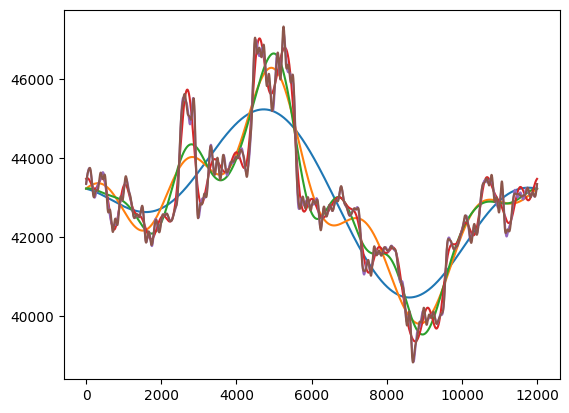

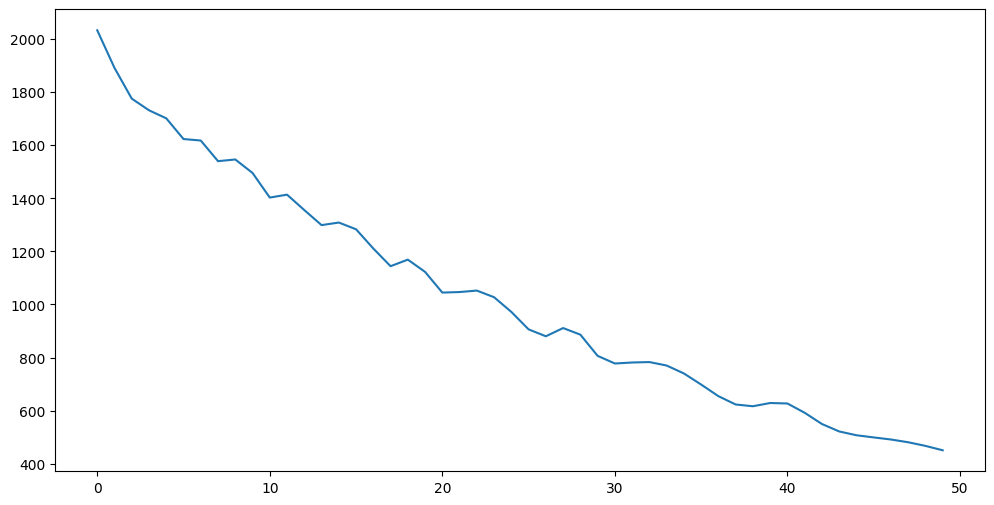

In [15]:
calculate(btc)
output_df_fft = calculate_fourier(btc)
btc =  pd.concat([btc,output_df_fft[["FT_3components",	"FT_6components",	"FT_9components",	"FT_27components",	"FT_81components",	"FT_100components"]]], axis=1)

btc = btc.dropna()
btc = btc.reset_index()
btc = btc.drop(columns=["index"])

df_vae = calculate_VAE(btc)
btc = pd.concat([btc, df_vae], axis=1)

btc = btc.dropna()
btc = btc.reset_index()
btc = btc.drop(columns=["index"])

saveFile(btc,"BTC")
renameIndex("BTC")

<ipython-input-30-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-30-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-30-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cboo

trainX: (5856, 50) trainY: (5856,)
testX: (5857, 50) testY: (5857,)
[1/50] Loss: 1072.3596210479736
[2/50] Loss: 1054.7099075317383
[3/50] Loss: 1024.8523139953613
[4/50] Loss: 983.0686988830566
[5/50] Loss: 950.1929292678833
[6/50] Loss: 868.0669937133789
[7/50] Loss: 798.8547306060791
[8/50] Loss: 756.3995313644409
[9/50] Loss: 721.7352981567383
[10/50] Loss: 688.972559928894
[11/50] Loss: 658.1127786636353
[12/50] Loss: 631.254937171936
[13/50] Loss: 604.2475385665894
[14/50] Loss: 576.3894529342651
[15/50] Loss: 564.7630052566528
[16/50] Loss: 530.7153072357178
[17/50] Loss: 504.51625061035156
[18/50] Loss: 495.80430698394775
[19/50] Loss: 452.37703371047974
[20/50] Loss: 452.71637535095215
[21/50] Loss: 432.0066418647766
[22/50] Loss: 393.6740827560425
[23/50] Loss: 365.1669602394104
[24/50] Loss: 365.88367652893066
[25/50] Loss: 355.0838408470154
[26/50] Loss: 317.31847953796387
[27/50] Loss: 295.91283798217773
[28/50] Loss: 286.8497176170349
[29/50] Loss: 277.3369917869568
[30/5

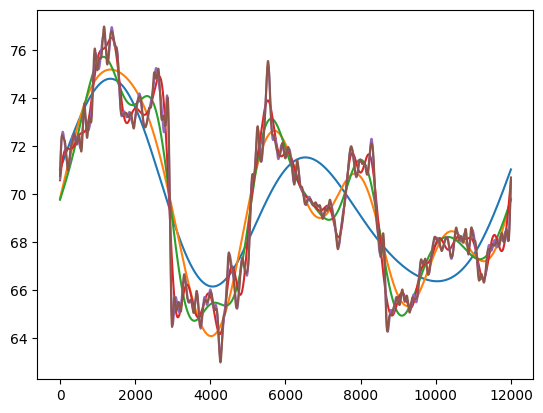

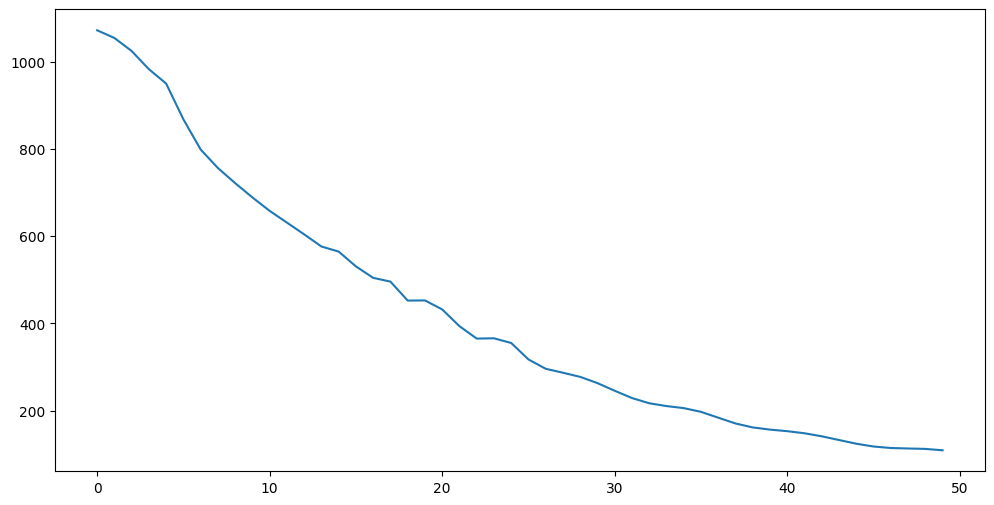

In [36]:
calculate(ltc)
output_df_fft = calculate_fourier(ltc)
ltc =  pd.concat([ltc,output_df_fft[["FT_3components",	"FT_6components",	"FT_9components",	"FT_27components",	"FT_81components",	"FT_100components"]]], axis=1)

ltc = ltc.dropna()
ltc = ltc.reset_index()
ltc = ltc.drop(columns=["index"])

df_vae = calculate_VAE(ltc)
ltc = pd.concat([ltc, df_vae], axis=1)

ltc = ltc.dropna()
ltc = ltc.reset_index()
ltc = ltc.drop(columns=["index"])

saveFile(ltc,"LTC")
renameIndex("LTC")


<ipython-input-30-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-30-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-30-fcbb8cf8ca5d>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cboo

trainX: (5856, 50) trainY: (5856,)
testX: (5857, 50) testY: (5857,)
[1/50] Loss: 1084.2357158660889
[2/50] Loss: 1025.7224521636963
[3/50] Loss: 1006.8014888763428
[4/50] Loss: 972.9711246490479
[5/50] Loss: 969.9151515960693
[6/50] Loss: 912.1971988677979
[7/50] Loss: 912.288402557373
[8/50] Loss: 890.5754833221436
[9/50] Loss: 847.7848768234253
[10/50] Loss: 806.0992002487183
[11/50] Loss: 780.855751991272
[12/50] Loss: 754.185435295105
[13/50] Loss: 726.5343160629272
[14/50] Loss: 704.5633935928345
[15/50] Loss: 683.956036567688
[16/50] Loss: 662.1204795837402
[17/50] Loss: 639.6849317550659
[18/50] Loss: 618.656328201294
[19/50] Loss: 600.233151435852
[20/50] Loss: 581.7980327606201
[21/50] Loss: 562.2313632965088
[22/50] Loss: 543.6731233596802
[23/50] Loss: 526.8655891418457
[24/50] Loss: 510.6525344848633
[25/50] Loss: 494.1752529144287
[26/50] Loss: 477.7529134750366
[27/50] Loss: 462.46203660964966
[28/50] Loss: 448.8147482872009
[29/50] Loss: 435.59213399887085
[30/50] Loss: 

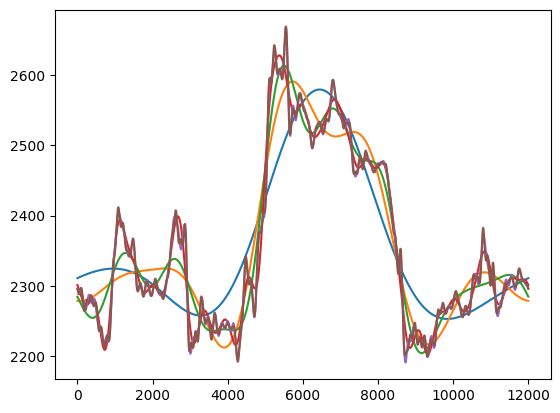

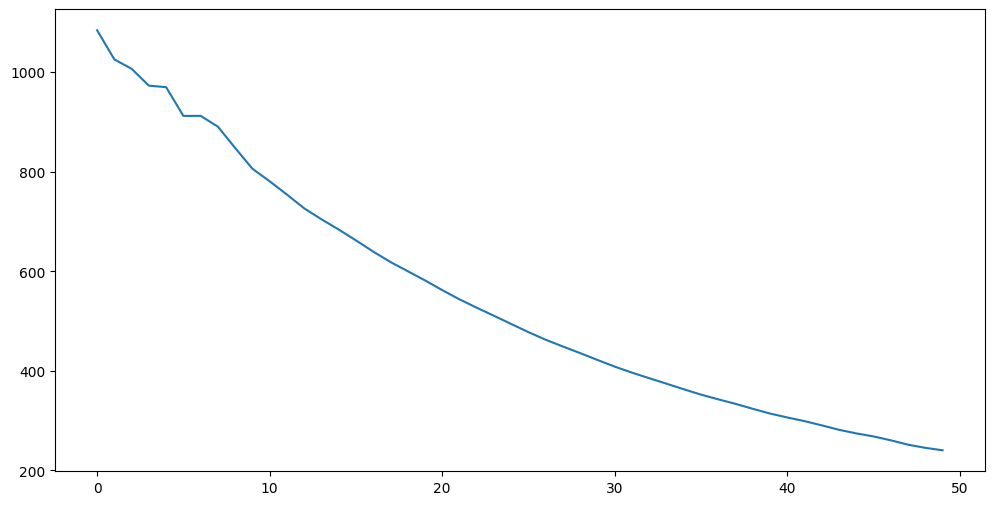

In [37]:
calculate(eth)
output_df_fft = calculate_fourier(eth)
eth =  pd.concat([eth,output_df_fft[["FT_3components",	"FT_6components",	"FT_9components",	"FT_27components",	"FT_81components",	"FT_100components"]]], axis=1)

eth = eth.dropna()
eth = eth.reset_index()
eth = eth.drop(columns=["index"])

df_vae = calculate_VAE(eth)
eth = pd.concat([eth, df_vae], axis=1)

eth = eth.dropna()
eth = eth.reset_index()
eth = eth.drop(columns=["index"])

saveFile(eth,"ETH")
renameIndex("ETH")


# PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_pca=btc.drop(['ds (UTC)'], axis=1)

In [ ]:
X = df_pca.values # matrix of dataframe
sc = StandardScaler()
X_std = sc.fit_transform(X) # standardizing the data

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_)

75


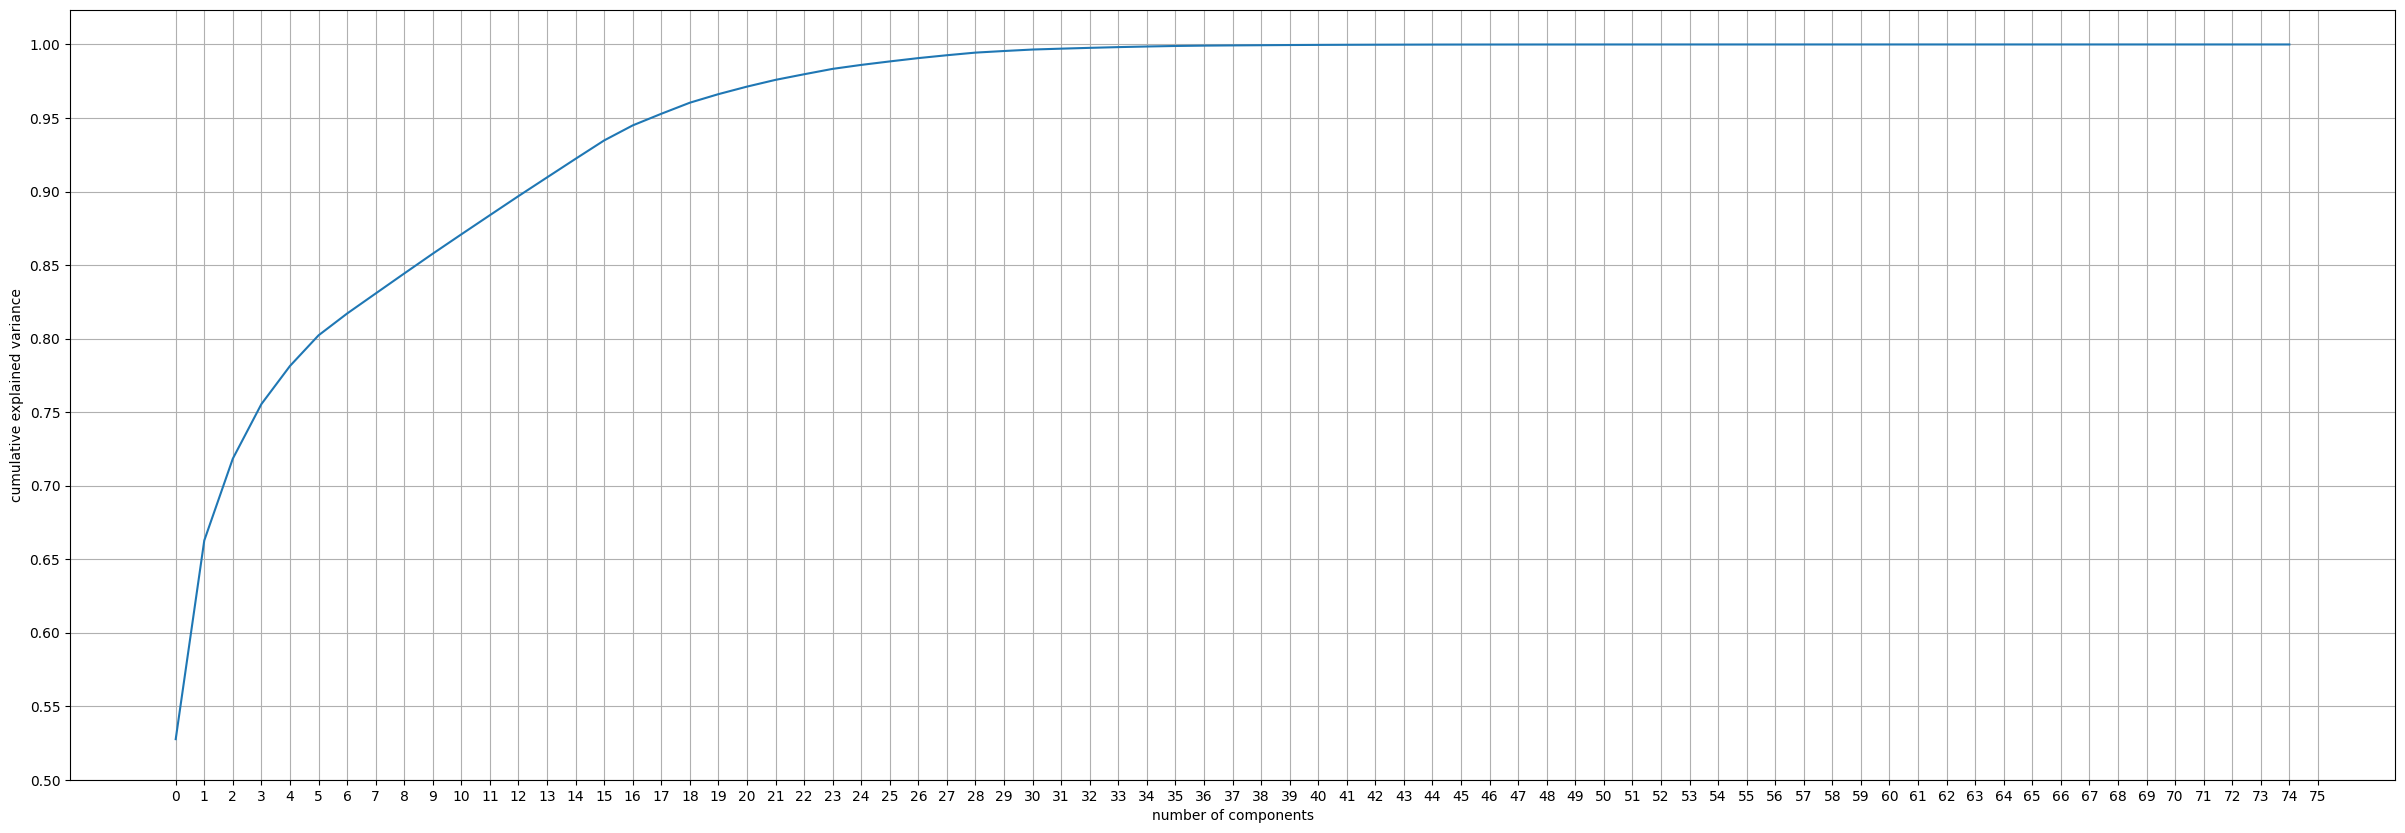

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, df_pca.shape[1]+1, 1.0))
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [ ]:
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df_pca.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
x=1
for i in most_important_names:
  print(x,i,end="\n")
  x+=1

1 ema_26
2 wrsi_12
3 atr_24
4 strength_line
5 log_change
6 fi_12
7 enc9
8 enc5
9 enc2
10 enc3
11 enc1
12 enc10
13 enc5
14 enc4
15 enc8
16 enc9
17 Volume
18 Volume
19 rsi_72
20 aroon_up
21 aroon_down
22 FT_3components
23 OBV
24 OBV
25 fi_12
26 rsi_12
27 rsi_24
28 MOM10
29 atr_12
30 FT_3components
31 dline
32 SMA_288
33 roc_12
34 kline
35 Lowerband_72
36 wrsi_12
37 FT_27components
38 FT_9components
39 Lowerband_24
40 signal_line
41 FT_81components
42 Lowerband_72
43 Upperband_48
44 wma_12
45 psar
46 Lowerband_12
47 FT_100components
48 Low
49 Lowerband_48
50 vwma_20
51 atr_48
52 pwma_12
53 High
54 ema_72
55 High
56 lsma_25
57 lsma_25
58 SMA_20
59 SMA_3
60 hwma_12
61 log_change
62 ema_72
63 wma_72
64 SMA_20
65 SMA_20
66 Close
67 wma_72
68 wma_48
69 ema_48
70 hwma_12
71 ema_20
72 SMA_72
73 ema_12
74 SMA_48
75 SMA_12


In [ ]:
num_components = 24
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [ ]:
df_PCA=X_pca.copy()
df_PCA = pd.DataFrame(df_PCA,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11","pca12","pca13","pca14","pca15","pca16","pca17","pca18","pca19","pca20","pca21","pca22","pca23","pca24"])
df_PCA.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24
0,1.011582,-1.691980,-1.373731,-0.975940,0.148755,0.912708,2.485813,-0.786061,1.024105,-0.698458,...,0.061116,-0.203594,0.109561,-0.324151,1.046605,0.309480,1.013042,-0.429250,0.146217,0.284763
1,1.101481,-3.001574,-0.621977,-1.562748,1.140594,1.090766,-0.259720,-0.468010,-1.690807,1.119214,...,-0.715752,0.164961,0.739354,-0.708313,0.666761,-0.425512,0.409281,-0.268498,0.445505,0.630407
2,1.120465,-3.422381,-0.335078,-1.580399,1.717861,0.920253,1.085711,1.245138,-2.005053,-1.143705,...,1.359739,-0.165075,0.391738,-0.712080,0.488854,-0.167468,-0.029642,-0.498128,0.472456,0.806254
3,1.150975,-2.978249,-0.759804,-1.150858,1.722414,0.958064,-0.304924,0.648062,-0.156554,-0.070614,...,-1.162888,0.872215,0.568729,0.085904,0.256671,-0.767657,-1.133651,-0.803646,0.418324,0.871763
4,1.195454,-2.856069,-1.015802,-1.288585,1.768231,1.245597,-1.747058,-0.142438,1.632157,1.227314,...,0.871017,0.099681,0.256612,-0.502832,0.539429,-0.390904,-1.041892,-0.897078,0.546831,0.882840
